In [1]:
import cv2


In [2]:
img=cv2.imread(r"D:\DLprojects\ztrials\car1.jpg")
img

array([[[211, 204, 184],
        [211, 204, 184],
        [211, 204, 184],
        ...,
        [ 97,  94,  73],
        [ 96,  93,  72],
        [ 98,  95,  74]],

       [[211, 204, 184],
        [211, 204, 184],
        [211, 204, 184],
        ...,
        [ 94,  91,  70],
        [ 94,  91,  70],
        [ 95,  92,  71]],

       [[211, 204, 184],
        [211, 204, 184],
        [211, 204, 184],
        ...,
        [101, 100,  79],
        [101, 100,  79],
        [101, 100,  79]],

       ...,

       [[112, 111, 101],
        [110, 109,  99],
        [107, 106,  96],
        ...,
        [187, 180, 163],
        [189, 182, 167],
        [182, 175, 158]],

       [[113, 111, 101],
        [114, 112, 102],
        [115, 113, 103],
        ...,
        [179, 175, 156],
        [177, 173, 155],
        [176, 172, 153]],

       [[114, 112, 102],
        [114, 112, 102],
        [115, 113, 103],
        ...,
        [180, 176, 157],
        [179, 175, 156],
        [178, 174, 155]]

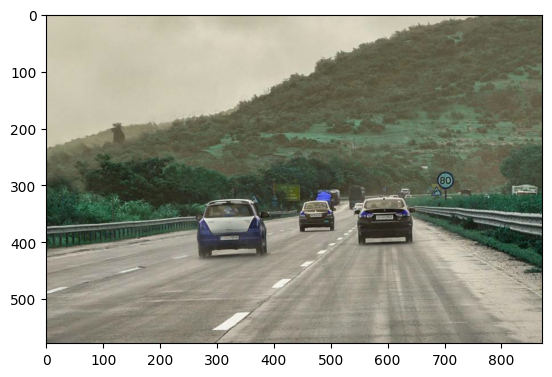

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img)


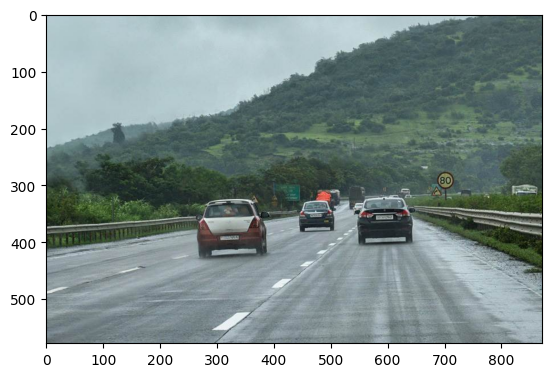

In [5]:
con_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(con_img)


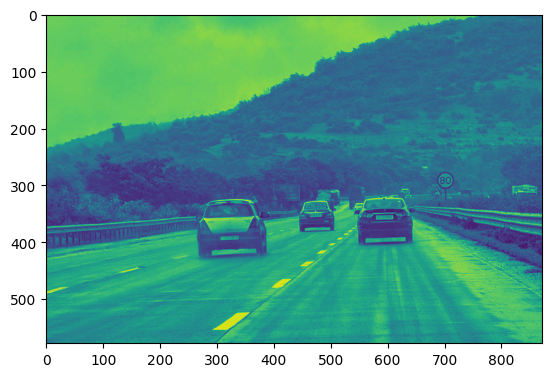

In [6]:
img_g=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_g)

In [7]:
img_g

array([[199, 199, 199, ...,  88,  87,  89],
       [199, 199, 199, ...,  85,  85,  86],
       [199, 199, 199, ...,  94,  94,  94],
       ...,
       [108, 106, 103, ..., 176, 178, 171],
       [108, 109, 110, ..., 170, 168, 167],
       [109, 109, 110, ..., 171, 170, 169]], dtype=uint8)

In [8]:
car_cas=cv2.CascadeClassifier(r"D:\DLprojects\ztrials\cars.xml")

In [9]:
car_cas

< cv2.CascadeClassifier 000001B1499B94B0>

In [10]:
car1=car_cas.detectMultiScale(img_g,minNeighbors=10,scaleFactor=1.1)

In [11]:
car1

array([[509, 270, 171, 171],
       [229, 290, 186, 186],
       [420, 296, 116, 116]])

In [12]:
for (x,y,w,h) in car1:
    cv2.rectangle(con_img,pt1=(x,y),pt2=(x+w,y+h),color=(255,0,0),thickness=4)

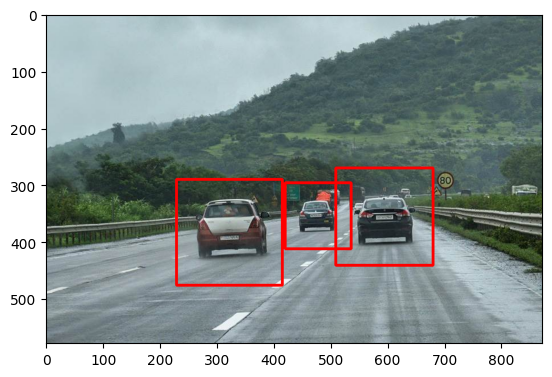

In [13]:
plt.imshow(con_img)

In [ ]:
video=cv2.VideoCapture(r"D:\DLprojects\ztrials\carvid.mp4.mp4")
while True:
    suc,frame=video.read()
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    carss=car_cas.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=10)
    #print(len(faces))
    for (x,y,w,h) in carss:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255.0,0),3)
    cv2.imshow("video",frame)   
    if cv2.waitKey(1) & 0XFF==ord('q'):
        break
video.release()
cv2.destroyAllWindows()